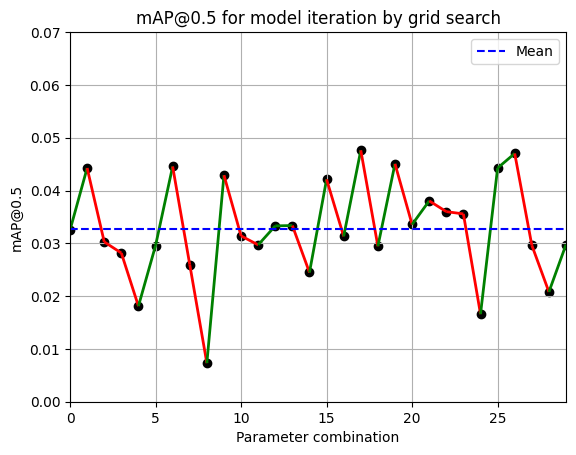

Mean mAP@0.5: 0.03275691854457003
Peak mAP@0.5: 0.04761904850602101


In [55]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

df = pd.read_json('result-grid.json')

epochs = df.index.to_numpy()
maps = df['val_map'].to_numpy()

# Prepare segments between consecutive points
points = np.array([epochs, maps]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Color segments green if going up, red if going down
colors = ['green' if y2 > y1 else 'red' for (x1,y1),(x2,y2) in segments]

lc = LineCollection(segments, colors=colors, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)

# Plot points on top
ax.scatter(epochs, maps, color='black')

# Draw mean line
mean_map = maps.mean()
ax.axhline(mean_map, color='blue', linestyle='--', linewidth=1.5, label=f"Mean")

# Set axis limits
ax.set_xlim(epochs.min(), epochs.max())
ax.set_ylim(0, 0.07)  # your original limit

ax.set_title("mAP@0.5 for model iteration by grid search")
ax.set_xlabel("Parameter combination")
ax.set_ylabel("mAP@0.5")
ax.grid(True)
ax.legend()

plt.show()

print("Mean mAP@0.5:", mean_map)
print("Peak mAP@0.5:", maps.max())
# No progression, just random chaos

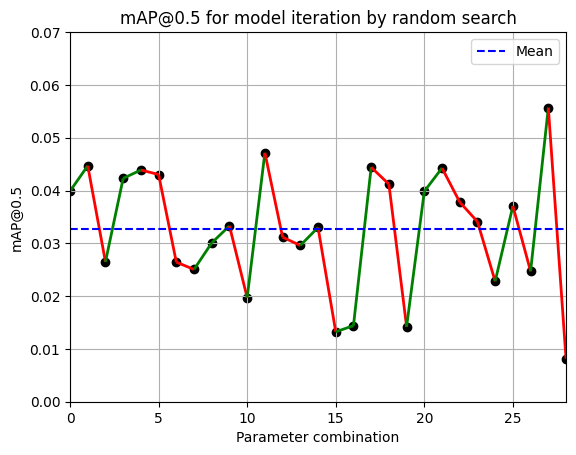

Mean mAP@0.5: 0.03267867522763745
Peak mAP@0.5: 0.055691044777631


In [53]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

df = pd.read_json('result-random.json')

epochs = df.index.to_numpy()
maps = df['value'].to_numpy()

# Prepare segments between consecutive points
points = np.array([epochs, maps]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Color segments green if going up, red if going down
colors = ['green' if y2 > y1 else 'red' for (x1,y1),(x2,y2) in segments]

lc = LineCollection(segments, colors=colors, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)

# Plot points on top
ax.scatter(epochs, maps, color='black')

# Draw mean line
mean_map = maps.mean()
ax.axhline(mean_map, color='blue', linestyle='--', linewidth=1.5, label=f"Mean")

# Set axis limits
ax.set_xlim(epochs.min(), epochs.max())
ax.set_ylim(0, 0.07)  # your original limit

ax.set_title("mAP@0.5 for model iteration by random search")
ax.set_xlabel("Parameter combination")
ax.set_ylabel("mAP@0.5")
ax.grid(True)
ax.legend()

plt.show()

print("Mean mAP@0.5:", mean_map)
print("Peak mAP@0.5:", maps.max())


# first peak: 4.76
# second peak: 5.57
# 0.81%